In [6]:
import pandas as pd

Read in
max wind speed
County value
Percent of each county that is lowest teir
Point lowest teir breaks

= 

county value*percent lowest

wind speed > Break point true or false

final column of cost
will also need the size of each county as cost is in m2

In [26]:
max_wind_speed_2020 = pd.read_csv('2005_windspeed.csv') # from Wind_Speed.ipynb
max_wind_speed_2020.columns = [col.lower().replace(" ", "_") + '_wind' for col in max_wind_speed_2020.columns]

In [27]:
county_land_value_2020 = pd.read_csv('2020_Land_Cover_County_Value.csv') # from Value_of_every_county.ipynb
county_land_value_2020.columns = [col.lower().replace(" ", "_")  + '_value' for col in county_land_value_2020.columns]

In [28]:
county_land_value_ll_2020 = pd.read_csv('2020_land_developed_low_intensity.csv') # from Value_of_every_county.ipynb
county_land_value_ll_2020.columns = [col.lower().replace(" ", "_")  + '_value_ll' for col in county_land_value_ll_2020.columns]

In [29]:
percent_developed_open_space =  pd.read_csv('2020_land_developed_open_space.csv') # from percent_land_type.ipynb
percent_developed_open_space.columns = [col.lower().replace(" ", "_") + '_developed' for col in percent_developed_open_space.columns]

Bring in damage curves

In [30]:
#frames = [max_wind_speed_2020, county_land_value_2020, percent_developed_open_space]

data = pd.concat([max_wind_speed_2020, county_land_value_2020, percent_developed_open_space, county_land_value_ll_2020], axis=1, join='inner')

In [32]:
damage_curves_land_cover =  pd.read_csv('2020_damage_curves_land_cover.csv') # from percent_land_type.ipynb
damage_curves_land_cover.columns = [col.lower().replace(" ", "_") + '_damage' for col in damage_curves_land_cover.columns]
damage_curves_land_cover

,wind_speed_damage,developed_high_intensity_damage,developed_medium_intensity_damage,developed_low_intensity_damage,developed_open_space_damage,pasture_hay_damage,cultivated_crops_damage,deciduous_forest_damage,evergreen_forest_damage,mixed_forest_damage,grasslands_damage,shrub_damage,barren_land_damage,woody_wetlands_damage,open_water_damage,open_water.1_damage
0,0,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,1,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
2,2,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
3,3,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
4,4,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
5,5,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
6,6,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
7,7,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
8,8,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
9,9,0.000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0


In [33]:
import numpy as np
#adding gust factor
#data['max_wind'] = np.floor(data['max_wind'] * 1.5).astype(int)

data['max_wind'] = np.floor(data['max_wind']).astype(int)

In [34]:
# result_df = data.merge(
#     damage_curves_land_cover[['wind_speed_damage', 'developed_open_space_damage']],  # Select relevant columns
#     left_on='max_wind',
#     right_on='wind_speed_damage',     
#     how='left'               
# )

In [35]:
#all damage columns

result_df = data.merge(
    damage_curves_land_cover,  # Select relevant columns
    left_on='max_wind',
    right_on='wind_speed_damage',     
    how='left'               
)
result_df

,unnamed:_0_wind,county_wind,mean_wind,max_wind,unnamed:_0_value,county_value,max_cost_value,mean_cost_value,std_cost_value,unnamed:_0_developed,...,cultivated_crops_damage,deciduous_forest_damage,evergreen_forest_damage,mixed_forest_damage,grasslands_damage,shrub_damage,barren_land_damage,woody_wetlands_damage,open_water_damage,open_water.1_damage
0,0,Camden,13.439216,19,0,Camden,101,0.654540,8.075730,0,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,1,Gates,12.305978,13,1,Gates,101,4.119099,17.882138,1,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
2,2,Iredell,10.584751,15,2,Iredell,101,12.007800,31.794424,2,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
3,3,Wilkes,13.641697,27,3,Wilkes,101,5.500630,21.792192,3,...,0.00100,0.0,0.0,0.0,0.00100,0.00100,0.00100,0.00100,0.0,0.0
4,4,Union,12.364009,15,4,Union,101,11.556034,31.339291,4,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
5,5,Cabarrus,11.512554,14,5,Cabarrus,101,13.769091,34.095721,5,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
6,6,Wake,11.334287,16,6,Wake,101,19.368655,39.142914,6,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
7,7,Franklin,11.284689,14,7,Franklin,101,4.977470,20.197598,7,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0
8,8,Pender,13.705195,33,8,Pender,101,3.837807,17.677738,8,...,2.85000,0.0,0.0,0.0,2.85000,2.85000,2.85000,2.85000,0.0,0.0
9,9,New Hanover,20.560635,35,9,New Hanover,101,13.144947,33.450766,9,...,10.75000,0.0,0.0,0.0,10.75000,10.75000,10.75000,10.75000,0.0,0.0


#Change percent damage into cost need meter of each county
then multiply our mapping by percent and meters

In [36]:
# Read the downloaded file into a pandas DataFrame
area_data = pd.read_csv('2020_gaz_counties_37.txt', delimiter='\t')  # Adjust delimiter if necessary

area_data['NAME'] = area_data['NAME'].str.replace(' County', '', regex=False)
# Drop all columns except 'NAME' and 'ALAND'
area_data = area_data[['NAME', 'ALAND_SQMI']]
print(area_data.head())

        NAME  ALAND_SQMI
0   Alamance     423.452
1  Alexander     259.985
2  Alleghany     234.835
3      Anson     531.461
4       Ashe     426.264


In [37]:
# Perform the join on the 'NAME' column in area_data and 'County_wind' column in result_df
merged_df = pd.merge(result_df, area_data, left_on='county_wind', right_on='NAME', how='left')

In [38]:
merged_df.columns

Index(['unnamed:_0_wind', 'county_wind', 'mean_wind', 'max_wind',
       'unnamed:_0_value', 'county_value', 'max_cost_value', 'mean_cost_value',
       'std_cost_value', 'unnamed:_0_developed', 'county_developed',
       'max_cost_developed', 'percent_land_developed_open_space_developed',
       'std_cost_developed', 'unnamed:_0_value_ll', 'county_value_ll',
       'max_cost_value_ll', 'percent_land_developed_open_space_value_ll',
       'std_cost_value_ll', 'wind_speed_damage',
       'developed_high_intensity_damage', 'developed_medium_intensity_damage',
       'developed_low_intensity_damage', 'developed_open_space_damage',
       'pasture_hay_damage', 'cultivated_crops_damage',
       'deciduous_forest_damage', 'evergreen_forest_damage',
       'mixed_forest_damage', 'grasslands_damage', 'shrub_damage',
       'barren_land_damage', 'woody_wetlands_damage', 'open_water_damage',
       'open_water.1_damage', 'NAME', 'ALAND_SQMI'],
      dtype='object')

In [39]:
sqmi_to_m2 = 2589989.17385
# Convert AREA_SQMI to area_m2 and add it as a new column
merged_df['area_m2'] = merged_df['ALAND_SQMI'] * sqmi_to_m2

value_open_space = 39
value_low_dev = 148

merged_df['area_damaged_open_space'] = merged_df['developed_open_space_damage'] * merged_df['percent_land_developed_open_space_developed'] * value_open_space
merged_df['area_damaged_ll'] = merged_df['developed_low_intensity_damage'] * merged_df['percent_land_developed_open_space_value_ll'] * value_low_dev
merged_df['area_damaged_all'] = merged_df['area_damaged_open_space'] + merged_df['area_damaged_open_space']

In [40]:
merged_df

,unnamed:_0_wind,county_wind,mean_wind,max_wind,unnamed:_0_value,county_value,max_cost_value,mean_cost_value,std_cost_value,unnamed:_0_developed,...,barren_land_damage,woody_wetlands_damage,open_water_damage,open_water.1_damage,NAME,ALAND_SQMI,area_m2,area_damaged_open_space,area_damaged_ll,area_damaged_all
0,0,Camden,13.439216,19,0,Camden,101,0.654540,8.075730,0,...,0.00000,0.00000,0.0,0.0,Camden,240.330,6.224521e+08,0.000000,0.000000,0.000000
1,1,Gates,12.305978,13,1,Gates,101,4.119099,17.882138,1,...,0.00000,0.00000,0.0,0.0,Gates,340.612,8.821814e+08,0.000000,0.000000,0.000000
2,2,Iredell,10.584751,15,2,Iredell,101,12.007800,31.794424,2,...,0.00000,0.00000,0.0,0.0,Iredell,574.409,1.487713e+09,0.000000,0.000000,0.000000
3,3,Wilkes,13.641697,27,3,Wilkes,101,5.500630,21.792192,3,...,0.00100,0.00100,0.0,0.0,Wilkes,753.679,1.952020e+09,0.006556,0.008281,0.013111
4,4,Union,12.364009,15,4,Union,101,11.556034,31.339291,4,...,0.00000,0.00000,0.0,0.0,Union,632.736,1.638779e+09,0.000000,0.000000,0.000000
5,5,Cabarrus,11.512554,14,5,Cabarrus,101,13.769091,34.095721,5,...,0.00000,0.00000,0.0,0.0,Cabarrus,361.232,9.355870e+08,0.000000,0.000000,0.000000
6,6,Wake,11.334287,16,6,Wake,101,19.368655,39.142914,6,...,0.00000,0.00000,0.0,0.0,Wake,834.587,2.161571e+09,0.000000,0.000000,0.000000
7,7,Franklin,11.284689,14,7,Franklin,101,4.977470,20.197598,7,...,0.00000,0.00000,0.0,0.0,Franklin,491.802,1.273762e+09,0.000000,0.000000,0.000000
8,8,Pender,13.705195,33,8,Pender,101,3.837807,17.677738,8,...,2.85000,2.85000,0.0,0.0,Pender,871.296,2.256647e+09,2.474296,5.547117,4.948592
9,9,New Hanover,20.560635,35,9,New Hanover,101,13.144947,33.450766,9,...,10.75000,10.75000,0.0,0.0,New Hanover,192.255,4.979384e+08,11.667041,97.472800,23.334082


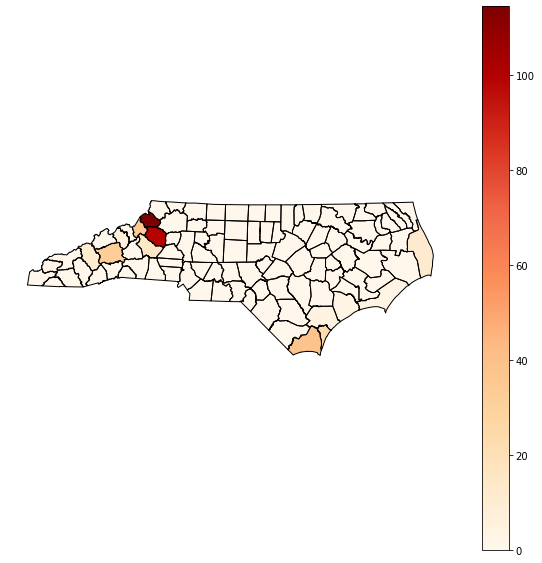

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
# Step 1: Read the shapefile into a GeoDataFrame
shapefile = "/data/HW/HW2/NCDOT_County_Boundaries.shp"  # Replace with the path to your shapefile
gdf = gpd.read_file(shapefile)
gdf_boundaries = gpd.read_file(shapefile)
# Step 2: Assume you have a pandas dataframe `data` with a column 'county' and 'developed'
# For example:
# data = pd.DataFrame({
#     'county': ['County A', 'County B', 'County C'], 
#     'developed': [0.2, 0.5, 0.7]
# })

# Step 3: Merge the DataFrame with the GeoDataFrame based on the 'county' column
# Ensure the 'county' column in both datasets has the same naming format
gdf = gdf.merge(merged_df, left_on='CountyName', right_on='county_wind', how='left')

# Step 4: Plot the GeoDataFrame with the 'developed' column as the color scale
# You can use a colormap to represent the 'developed' values
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='area_damaged_all', ax=ax, legend=True,
         legend_kwds={'label': "Developed (%) by County",
                      'orientation': "horizontal"},
         cmap='OrRd')  # Choose any colormap you like
gdf_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
ax.set_axis_off()
# Step 5: Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


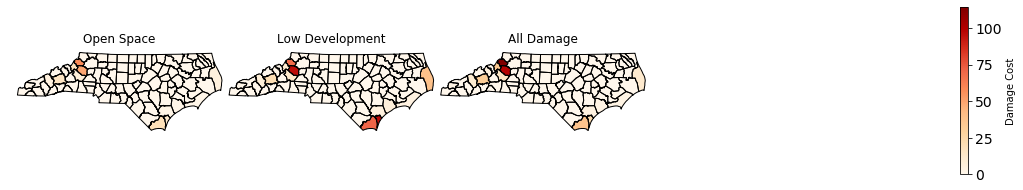

In [42]:

# Define the columns to plot and the titles for each map
columns = ['area_damaged_open_space', 'area_damaged_ll', 'area_damaged_all']
titles = ['Open Space', 'Low Development', 'All Damage']

# Calculate the overall min and max values across all columns to use consistent color limits
vmin = min(gdf[col].min() for col in columns)
vmax = max(gdf[col].max() for col in columns)

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each column on a separate subplot
for ax, column, title in zip(axes, columns, titles):
    gdf.plot(column=column, ax=ax, legend=False, cmap='OrRd', vmin=vmin, vmax=vmax)  # Disable individual legends
    gdf_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
    ax.set_title(title)  # Set the title from the titles list
    ax.set_axis_off()  # Hide the axis

# Add a single legend for all subplots
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # Required for ScalarMappable to work
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction= 0.01, pad=-0.5)
cbar.set_label('Damage Cost')  # Label for the colorbar
cbar.ax.tick_params(labelsize=14)  # Increase the font size of the tick labels

# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


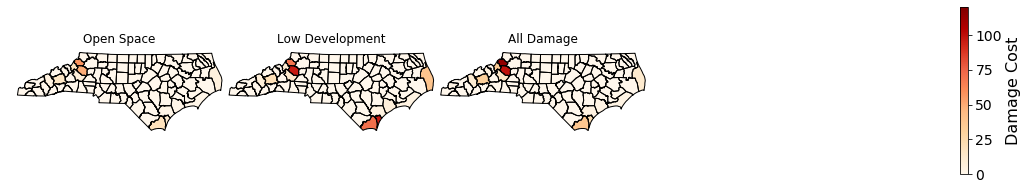

In [45]:
# Define the columns to plot and the titles for each map
columns = ['area_damaged_open_space', 'area_damaged_ll', 'area_damaged_all']
titles = ['Open Space', 'Low Development', 'All Damage']

# Set fixed vmin and vmax for the color bar
vmin = 0
vmax = 120

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each column on a separate subplot
for ax, column, title in zip(axes, columns, titles):
    gdf.plot(column=column, ax=ax, legend=False, cmap='OrRd', vmin=vmin, vmax=vmax)  # Disable individual legends
    gdf_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
    ax.set_title(title)  # Set the title from the titles list
    ax.set_axis_off()  # Hide the axis

# Add a single legend for all subplots
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # Required for ScalarMappable to work
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.01, pad=-0.5)
cbar.set_label('Damage Cost', fontsize=16)  # Label for the colorbar
cbar.ax.tick_params(labelsize=14)  # Increase the font size of the tick labels

# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


In [460]:
selected_columns = gdf[['CountyName','area_damaged_open_space', 'area_damaged_ll', 'area_damaged_all']]

# Save the selected columns to a CSV file
selected_columns.to_csv('2019_damage.csv', index=False)